## Using mini-api and twitter api to obtain last 7 days of price change and sentiment changes

In [1]:
%matplotlib notebook

In [2]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
import time
import requests
import json

In [3]:
from pprint import pprint

## using mini-api for cryptocurrency for price changes

In [22]:
url = "https://min-api.cryptocompare.com/data/histominute?fsym=BTC&tsym=GBP&limit=300"
response = requests.get(url)
print(response.url)

https://min-api.cryptocompare.com/data/histominute?fsym=BTC&tsym=GBP&limit=300


### Create Module to refresh graph for most recent seven days

In [17]:
def refresh_priceChange():
    Timestamp = []
    Close = []
    converted_time = []
    #extract timestamp and USD price from json
    data = response.json()
    #pprint(data)
    for x in data['Data']:
        Timestamp.append(x['time'])
        Close.append(x['close'])
    
    #create data frame from file and then add a converted timestamp column to df
    for each in Timestamp:
        converted_time.append(str(each))
        
    price_by_minute = [('Timestamp', Timestamp),('Close',Close), ('Converted Time',converted_time)]
    btc_prices = pd.DataFrame.from_items(price_by_minute)
    btc_prices['Converted Time'] = pd.to_datetime(btc_prices['Timestamp'], unit = 's')
    btc_prices.set_index(['Converted Time'], inplace = True)
    
    #create plot
    plt.clf()
    
    plt.plot(btc_prices.index.values,btc_prices['Close'])
    plt.xlabel('Date')
    plt.ylabel('USD')
    plt.xticks(rotation = 'vertical')
    plt.tight_layout()
    plt.show()
    plt.savefig('../Output/btc_mostrecentSeven.png')

<IPython.core.display.Javascript object>


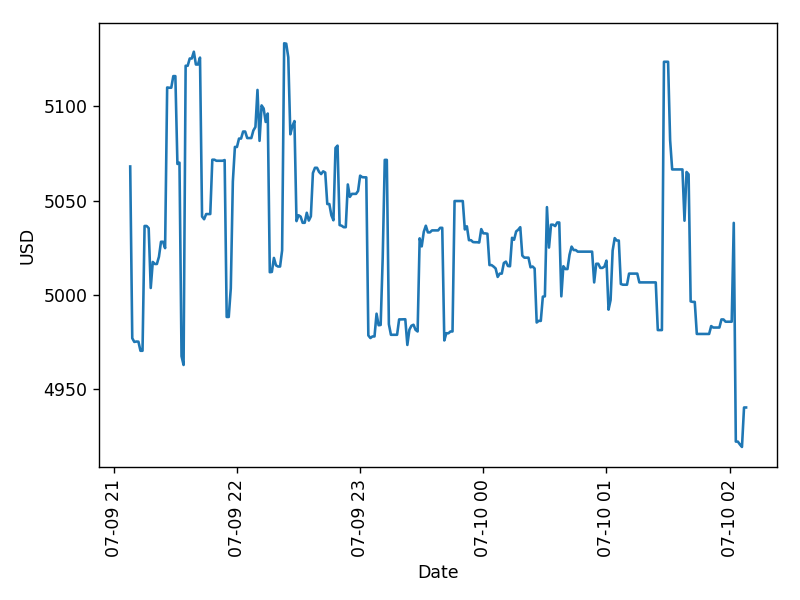

In [23]:
keep = True
counter = 0

while(keep):

    # update plot
    refresh_priceChange()
    
    # Once tweeted, wait 60 seconds before doing anything else
    time.sleep(60)

    # Add 1 to the counter prior to re-running the loop
    counter = counter + 1
    
    if (counter == 1):
       keep = False 